The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

United States of America
Male
2000
{2020: 'Literature'}


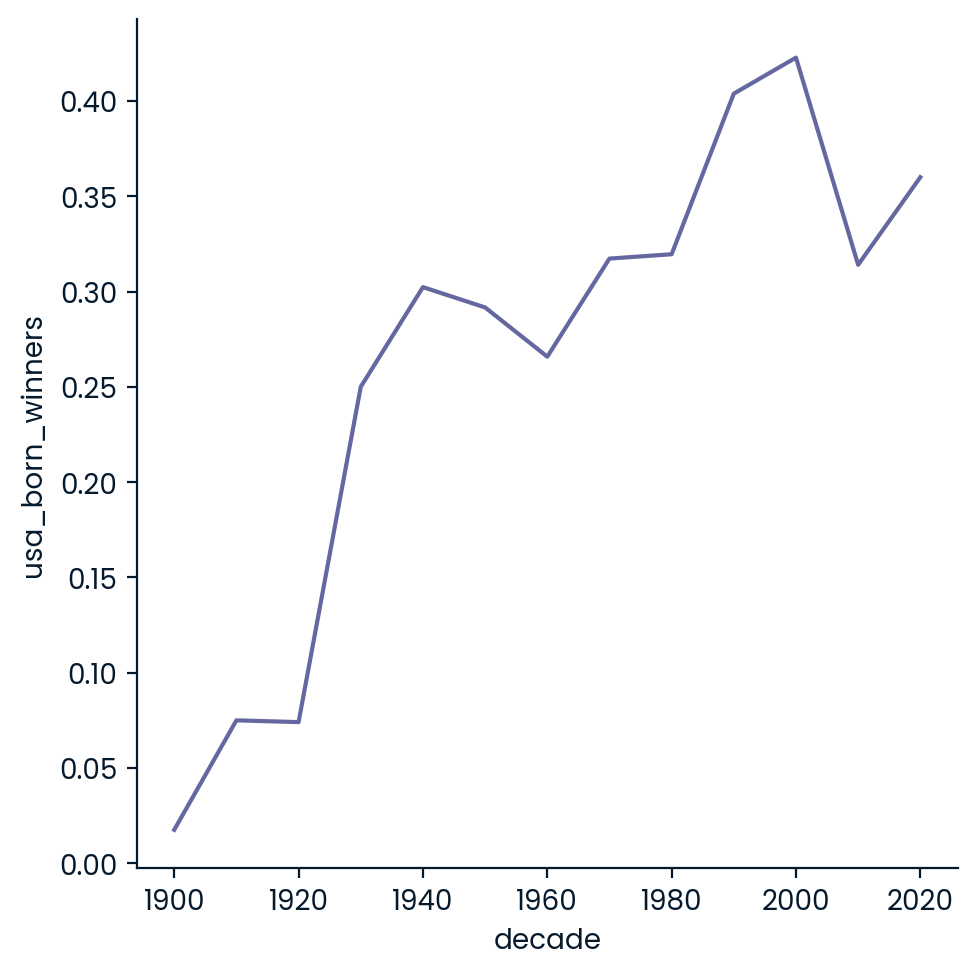

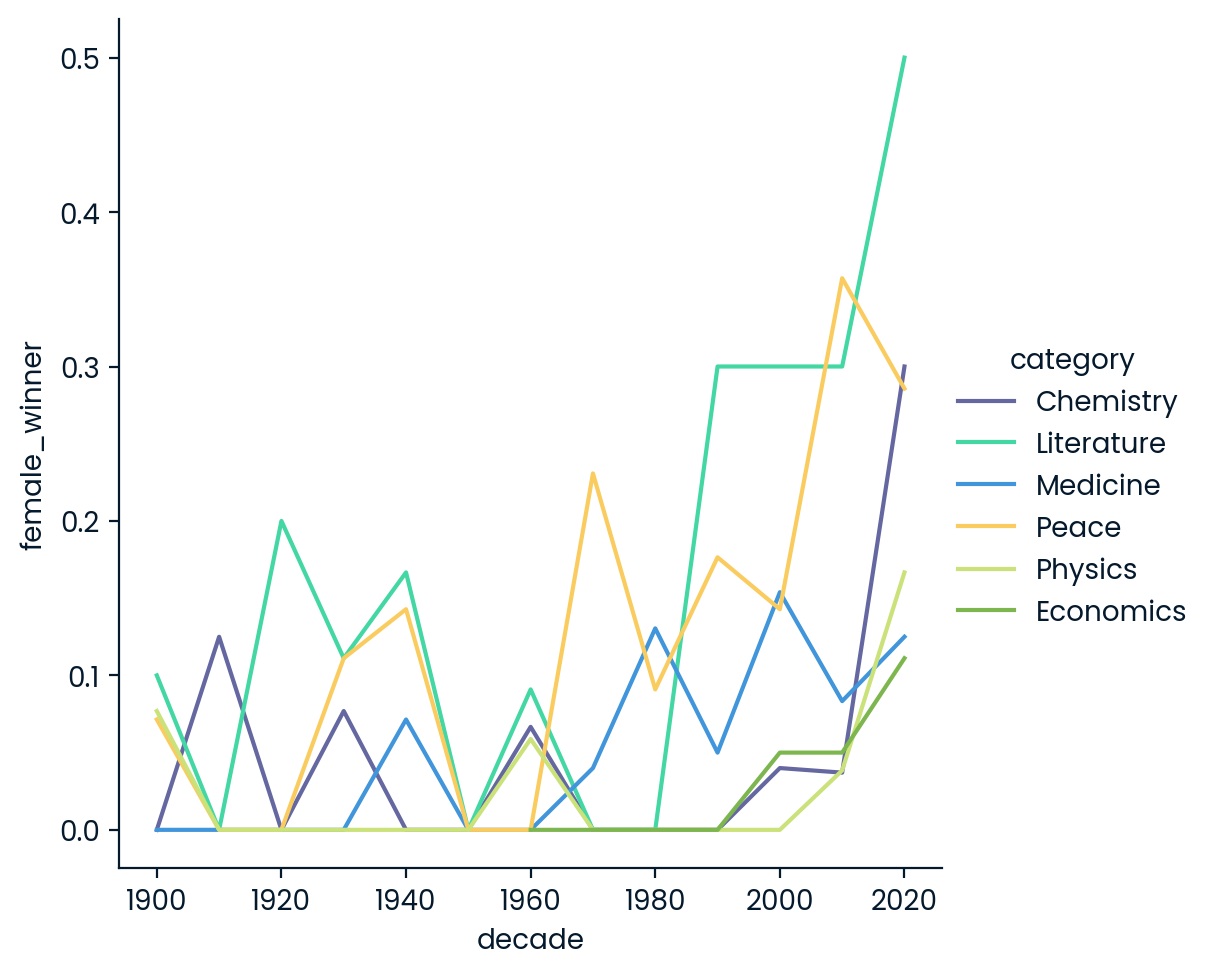

In [1]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np

# Start coding here!
nobel_df = pd.read_csv('data/nobel.csv')
#Let's extract the top values from sex and birth_country
top_gender = nobel_df['sex'].value_counts().idxmax()
top_country = nobel_df['birth_country'].value_counts().idxmax()
print(top_country)
print(top_gender)
#Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?
nobel_df['usa_born_winners'] = nobel_df['birth_country'] == 'United States of America'
nobel_df['decade'] = np.floor(nobel_df['year'] / 10) * 10
nobel_df['decade'] = nobel_df['decade'].astype(int)
df_new = nobel_df.groupby('decade', as_index=False)['usa_born_winners'].mean()
max_decade_usa = df_new[df_new['usa_born_winners'] == df_new['usa_born_winners'].max()]['decade'].values[0]
print(max_decade_usa)
sns.relplot(x='decade', y='usa_born_winners', data=df_new, kind='line');

nobel_df['female_winner'] = nobel_df['sex'] == 'Female'
df_female = nobel_df.groupby(['decade', 'category'], as_index=False)['female_winner'].mean()
max_female_dict = {
    df_female[df_female['female_winner'] == df_female['female_winner'].max()]['decade'].values[0]: df_female[df_female['female_winner'] == df_female['female_winner'].max()]['category'].values[0]
}
print(max_female_dict)
sns.relplot(x='decade', y='female_winner', data=df_female, hue='category', kind='line');


In [2]:
new_df = nobel_df[nobel_df['female_winner']]
min_row = new_df[new_df['year'] == new_df['year'].min()]
first_woman_name, first_woman_category = min_row['full_name'].values[0], min_row['category'].values[0]
print(first_woman_name)
print(first_woman_category)

Marie Curie, née Sklodowska
Physics


In [3]:
repeat_winners = pd.DataFrame(nobel_df['full_name'].value_counts())

repeat_list = nobel_df['full_name'].value_counts()[ nobel_df['full_name'].value_counts()>1].index.tolist()